# Principal Component Analysis (PCA)

The **goal** of PCA is identify patterns and detect the correlation between independent variables.

## Step-by-step

+ **Step 1.** Standardize the data. PCA is sensitive to scale, so the normalization of the data is needed.
+ **Step 2.** Compute covariance matrix. The covariance matrix shows how features vary with respect to each other. A high covariance between two features means they contain redundant information.
+ **Step 3.** Compute Eigenvalues and Eigenvectors
  + **Eigenvalues** indicate the variance explained by each principal component.
  + **Eigenvectors** indicate the directions of the new feature axes.
+ **Step 4.** Sort Eigenvalues (desc order) & Select Principal Components
+ **Step 5.** Compute Explained Variance Ratio. The explained variance ratio tells us how much information each principal component retains. If the first few components explain most of the variance, we can reduce dimensionality.
+ **Step 6.** Project Data onto Principal Components

In [1]:
library(tidyverse)
library(ggplot2)
library(caret)
library(e1071)

options(repr.plot.width=12, repr.plot.height=8)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Загрузка требуемого пакета: lattice


Присоединяю пакет: ‘caret’


Следующий объект скрыт от ‘package:purrr’:

    lift




## Dataset

In [2]:
data <- read_csv('../00_data/Wine.csv', show_col_types = FALSE)

head(data)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [3]:
glimpse(data)

Rows: 178
Columns: 14
$ Alcohol              <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20, 14.39, …
$ Malic_Acid           <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1…
$ Ash                  <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45, 2.61, 2…
$ Ash_Alcanity         <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6, 17.6, 1…
$ Magnesium            <dbl> 127, 100, 101, 113, 118, 112, 96, 121, 97, 98, 10…
$ Total_Phenols        <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50, 2.60, 2…
$ Flavanoids           <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2…
$ Nonflavanoid_Phenols <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30, 0.31, 0…
$ Proanthocyanins      <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.25, 1…
$ Color_Intensity      <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25, 5.05, 5…
$ Hue                  <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02, 1.06, 1…
$ OD280                <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58, 3.58, 2…
$ Proline         

## Splitting the data into training and test set

In [4]:
set.seed(42)

train_data <- data |>
                slice_sample(prop = 0.8)
test_data <- data |>
            anti_join(train_data, by = colnames(data))

In [5]:
dim(train_data)

[1] 142  14

In [6]:
dim(test_data)

[1] 36 14

## Feature Scaling

In [7]:
train_data[-ncol(train_data)] <- scale(train_data[-ncol(train_data)])
test_data[-ncol(test_data)] <- scale(test_data[-ncol(test_data)])

In [8]:
head(train_data)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.3072343,-0.2372711,0.07002803,-0.2064507,0.1736353,0.7022699,0.8614656,-0.3499247,1.29079438,0.4971691,0.4447531,0.1572891,1.0046832,1
-0.9875430,-0.7880231,0.54704556,-0.1479357,0.2402737,-0.6596675,-0.3151531,0.7284743,-0.99486314,-0.8931451,2.1143564,-0.5896066,-1.2663859,2
0.1301206,-0.3532189,1.35430600,1.7538008,1.0399345,-0.1687366,-0.7878118,-0.8476473,-0.09753093,0.8821792,-1.5763456,-1.8823107,-1.0408897,3
-0.0125599,-0.5754522,0.80390116,3.0703876,2.5726178,1.5732764,0.8312959,-1.2624161,0.57970093,-0.7220295,1.4992394,1.2345425,0.7630801,2
0.1895707,1.2603879,-0.84731337,0.4372140,0.1069969,-1.2772903,-1.5219414,0.5625667,-0.53773163,-0.4439666,-1.6202825,-1.3795924,0.2637671,3
-1.7128353,-0.2082842,3.11560149,2.6315253,1.2398498,1.3832386,3.0336846,0.8943818,0.42732376,0.4116113,-0.1703639,1.5074467,-0.9120347,2


## Applying PCA

In [9]:
pca <- preProcess(x = train_data[-14],
                       method = "pca",
                       pcaComp = 2)
train_data <- predict(pca, train_data)
train_data <- train_data[, c(2, 3, 1)]
test_data <- predict(pca, test_data)
test_data <- test_data[, c(2, 3, 1)]

In [10]:
train_data$Customer_Segment = factor(train_data$Customer_Segment)
test_data$Customer_Segment = factor(test_data$Customer_Segment)

## Training the Logistic Regression model on the training set

In [11]:
fit <- svm(Customer_Segment ~ ., data = train_data)
summary(fit)


Call:
svm(formula = Customer_Segment ~ ., data = train_data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  37

 ( 13 14 10 )


Number of Classes:  3 

Levels: 
 1 2 3




In [12]:
# Evaluation
y_pred <- predict(fit, test_data)
y_pred

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  2  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3 
27 28 29 30 31 32 33 34 35 36 
 3  3  3  3  3  3  3  3  3  3 
Levels: 1 2 3

## Model Performance

### Confusion Matrix

In [13]:
table(test_data$Customer_Segment, y_pred)

   y_pred
     1  2  3
  1  9  1  0
  2  0 13  0
  3  0  0 13

### Accuracy

In [14]:
accuracy <- mean(test_data$Customer_Segment == y_pred)
print(paste('Accuracy:', round(accuracy*100, 2), "%"))

[1] "Accuracy: 97.22 %"


## Viz the results

In [15]:
svm_pred_boundary <- function(df_train, df_test, name){
    X1 <- seq(min(df_test$PC1) - 1, max(df_test$PC1) + 1, length.out = 200)
    X2 <- seq(min(df_test$PC2) - 1, max(df_test$PC2) + 1, length.out = 200)
    grid <- expand.grid(X1, X2)
    colnames(grid) <- c('PC1', 'PC2')
    grid$Prediction <- predict(fit, newdata = grid)
    
    print(ggplot() +
        geom_tile(data=grid, aes(x = PC1, y = PC2, fill = as.factor(Prediction)), alpha=0.4) +
        geom_point(df_test, mapping=aes(x = PC1, y = PC2, colour = Customer_Segment), size=2) +
        scale_fill_manual(values = c("red", "blue", "orange"), name = "Prediction") +
        scale_color_manual(values = c("red", "blue", "orange"), name = "Customer_Segment") +
        labs(title = paste0("SVM (", name,")"), x = "PC1", y = "PC2") +
        theme_minimal())
}

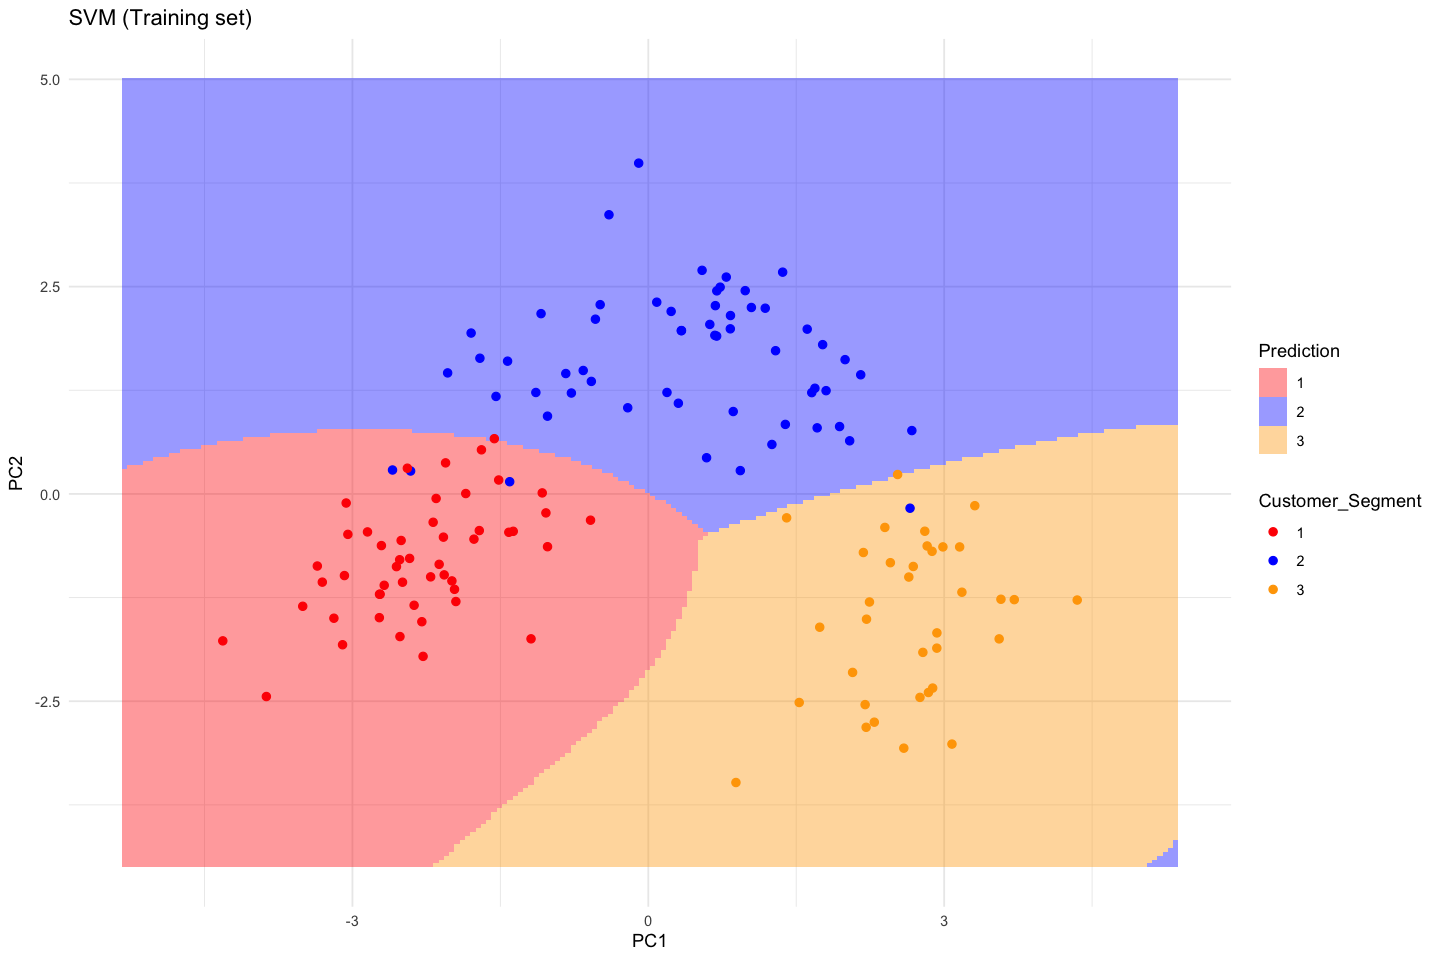

In [16]:
svm_pred_boundary(train_data, train_data, 'Training set')

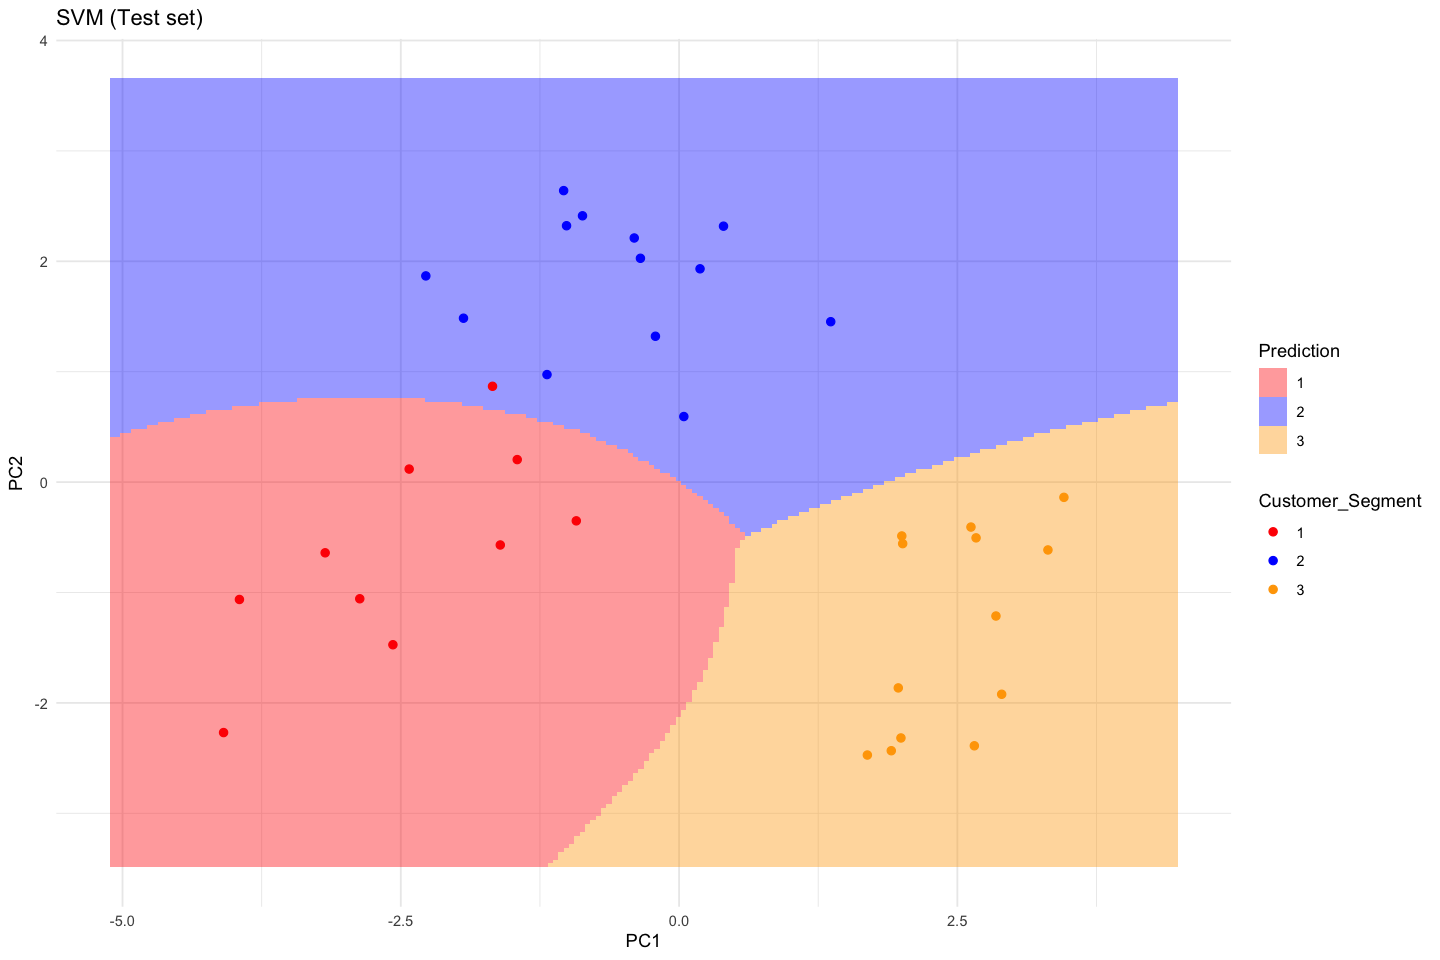

In [17]:
svm_pred_boundary(test_data, test_data, 'Test set')